# Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display, Math
from IPython.display import display as disp

from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [7]:
plt.style.use('seaborn-v0_8-talk')

## Parâmetros do MZM

O sinal óptico na saída do MZM é:

\begin{align}
E_{out}(t) &= \frac{E_{in}(t)}{2}e^{j\phi_1(t)} + \frac{E_{in}(t)}{2}e^{j\phi_2(t)} \\
&= E_{in}(t)\cos\left( \frac{u(t)}{2V_{\pi}}\pi \right)
\end{align}

A transmitância, obtida a partir da relação das intensidades de campo elétrico, é:

\begin{equation}
\frac{\left| E_{out}(t) \right|^2}{\left| E_{in}(t) \right|^2} = \frac{P_{out}(t)}{P_{in}(t)} = \frac{1}{2} + \frac{1}{2} \cos\left( \frac{u(t)}{V_{\pi}}\pi \right)
\end{equation}

In [3]:
def MZM(V, Vdc, Vpi):
  return (np.cos(np.pi/2*(V+Vdc)/Vpi))

In [4]:
Vmax = 2
Vmin = -2
V = np.linspace(Vmin, Vmax, 100)

In [5]:
Vpi = 1
Vdc = 0

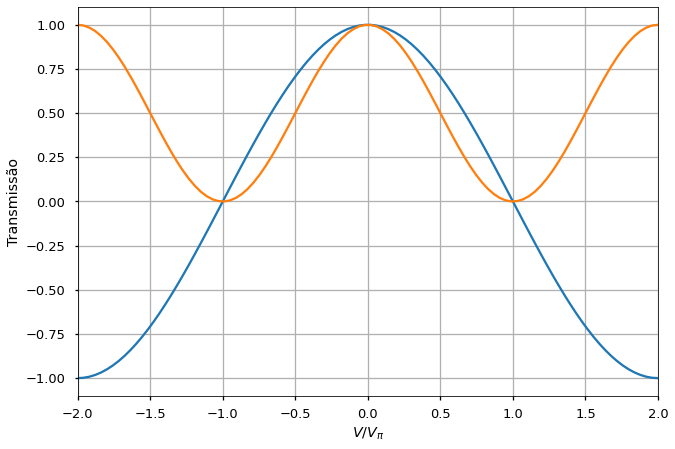

In [8]:
fig1 = plt.figure()
plt.plot(V, MZM(V, Vdc, Vpi), label = 'Field')
plt.plot(V, np.abs(MZM(V, Vdc, Vpi))**2, label = 'Power')
plt.xlabel(r'$V/V_\pi$')
plt.ylabel('Transmissão')
plt.xlim([Vmin, Vmax])
plt.grid(True)

In [9]:
Vdc = -Vpi

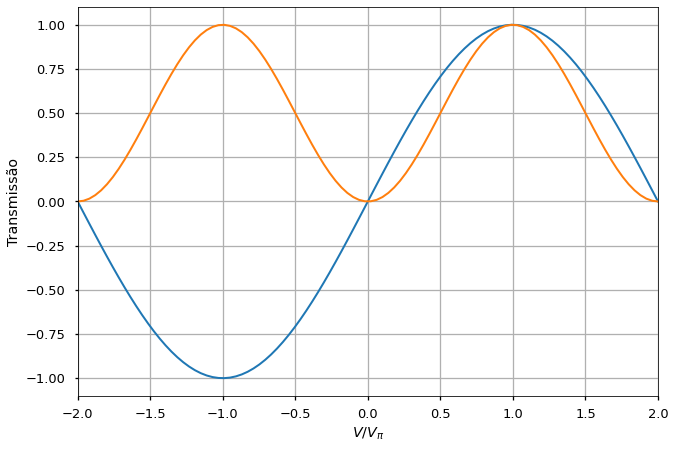

In [10]:
plt.plot(V, MZM(V, Vdc, Vpi), linewidth = 2, label = 'Field')
plt.plot(V, np.abs(MZM(V, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel(r'$V/V_\pi$')
plt.ylabel('Transmissão')
plt.xlim([Vmin, Vmax])
plt.grid(True)

## Sinal modulante

In [11]:
!pip install OptiCommPy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 KB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 KB 7.1 MB/s eta 0:00:00
  Created wheel for OptiCommPy: filename=OptiCommPy-0.3.0-py3-none-any.whl size=53864 sha256=70da8319322585ecb4e0d80b6521bda6df43b86bc3390e23582f9f7263cb3363
  Stored in directory: /root/.cache/pip/wheels/05/80/18/620e275b008cb909f1542eac0222f8f538add190c386aa39e3
  Created wheel for scikit-commpy: filename=scikit_commpy-0.8.0-py3-none-any.whl size=115022 sha256=b7f9fb52beeae017372b4c2ac7f8273cdb87422c5612d51fc6d00dc3c1259571
  Stored in directory: /root/.cache/pip/wheels/68/35/df/fb788af1195

In [12]:
from commpy.utilities  import signal_power, upsample
from optic.dsp import firFilter, pulseShape
from optic.plot import eyediagram

In [13]:
# parâmetros da simulação
SpS = 32

Rs  = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem
P0  = 1             # Potência

In [21]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=20)    
n      = np.arange(0, bits.size)
# mapeia bits para símbolos OOK
symbTx = np.sqrt(P0)*bits
# upsampling
symbolsUp = upsample(symbTx, SpS)
# pulso retangular ideal
pulse = pulseShape('rect', SpS)
pulse = pulse/max(abs(pulse))
#formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
# plota sinal 
t = np.arange(0, sigTx.size)*(Ta/1e-12)
# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan
symbolsUp = (symbolsUp + 1)/2

<ipython-input-22-b473a3c03a56>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[0].stem(symbTx, basefmt=" ", use_line_collection=True)


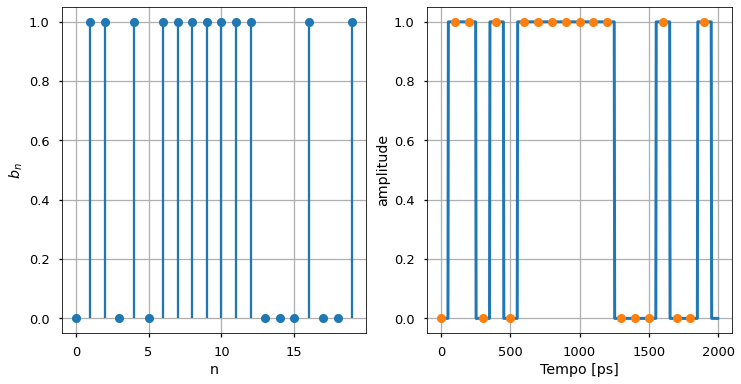

In [22]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].stem(symbTx, basefmt=" ", use_line_collection=True)
axs[0].set_xlabel('n')
axs[0].set_ylabel('$b_n$')
axs[0].grid(True)

axs[1].plot(t, sigTx.real,'-', linewidth=3)
axs[1].plot(t, symbolsUp.real, 'o')
axs[1].set_xlabel('Tempo [ps]')
axs[1].set_ylabel('amplitude')
axs[1].grid(True)

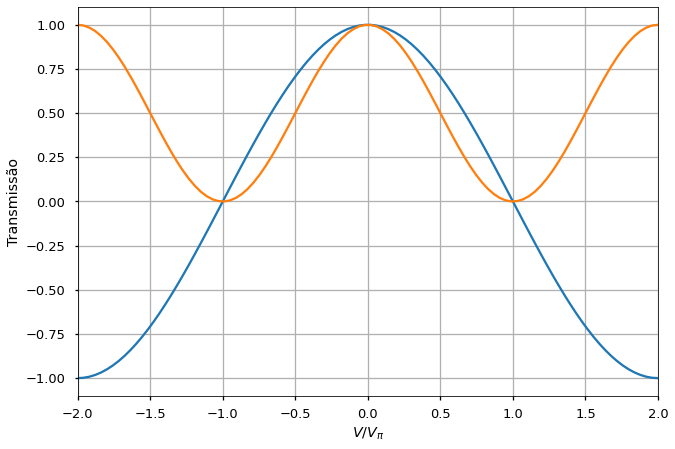

In [23]:
fig1

In [24]:
Vpi  = 1
Vdc  = 0

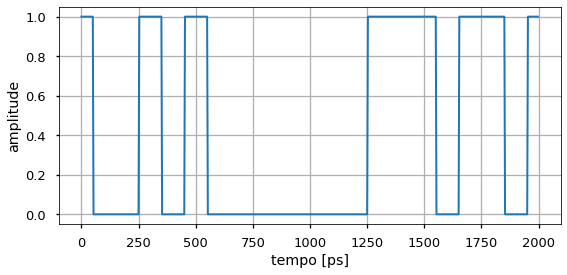

In [25]:
plt.figure(figsize=(9,4))
plt.plot(t, np.abs(MZM(sigTx.real, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.grid(True)

In [30]:
Vpi  = 1
Vdc  = -Vpi

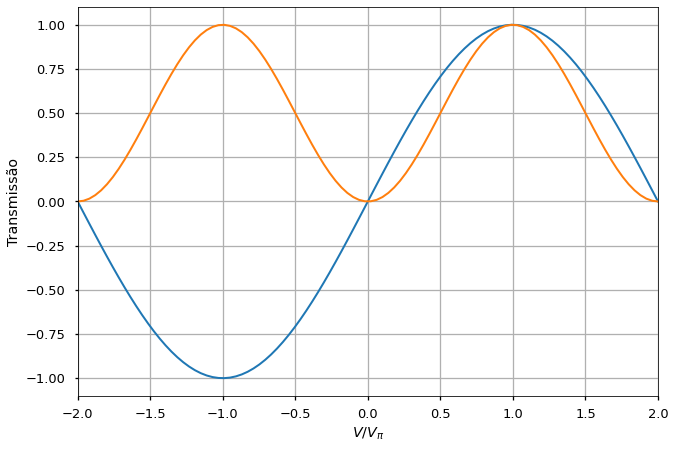

In [31]:
plt.plot(V, MZM(V, Vdc, Vpi), linewidth = 2, label = 'Field')
plt.plot(V, np.abs(MZM(V, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel(r'$V/V_\pi$')
plt.ylabel('Transmissão')
plt.xlim([Vmin, Vmax])
plt.grid(True)

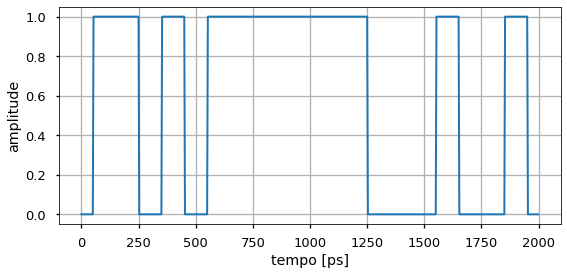

In [27]:
plt.figure(figsize=(9,4))
plt.plot(t, np.abs(MZM(sigTx.real, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.grid(True)

In [32]:
Vpi  = 1
Vdc  = -Vpi/2

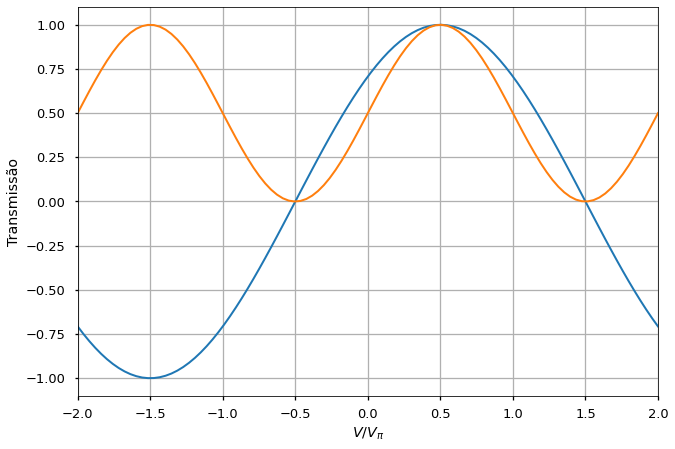

In [33]:
plt.plot(V, MZM(V, Vdc, Vpi), linewidth = 2, label = 'Field')
plt.plot(V, np.abs(MZM(V, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel(r'$V/V_\pi$')
plt.ylabel('Transmissão')
plt.xlim([Vmin, Vmax])
plt.grid(True)

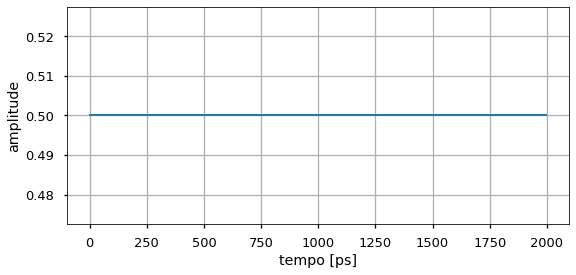

In [36]:
plt.figure(figsize=(9,4))
plt.plot(t, np.abs(MZM(sigTx.real, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.grid(True)

## Limitação em frequência

Considere que a resposta do driver ou modulado em frequência é limitado. 

In [37]:
# upsampling
symbolsUp = upsample(symbTx, SpS)
# pulso retangular ideal
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))
#formatação de pulso retangular
sigTx_nrz  = firFilter(pulse, symbolsUp)
# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan
symbolsUp = (symbolsUp + 1)/2

<ipython-input-38-cb70d464e9bd>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[0].stem(symbTx, basefmt=" ", use_line_collection=True)


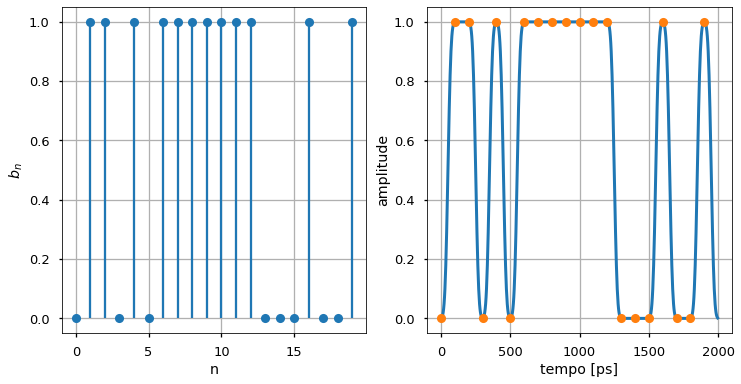

In [38]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].stem(symbTx, basefmt=" ", use_line_collection=True)
axs[0].set_xlabel('n')
axs[0].set_ylabel('$b_n$')
axs[0].grid(True)

axs[1].plot(t, sigTx_nrz.real,'-', linewidth=3)
axs[1].plot(t, symbolsUp.real, 'o')
axs[1].set_xlabel('tempo [ps]')
axs[1].set_ylabel('amplitude')
axs[1].grid(True)

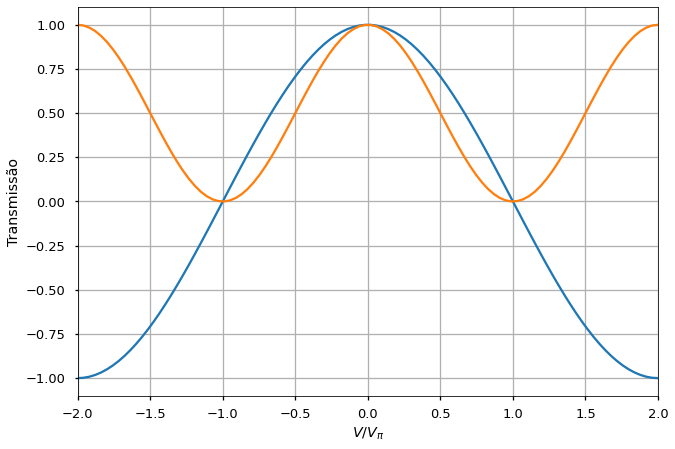

In [39]:
fig1

In [40]:
Vpi  = 1
Vdc  = -Vpi

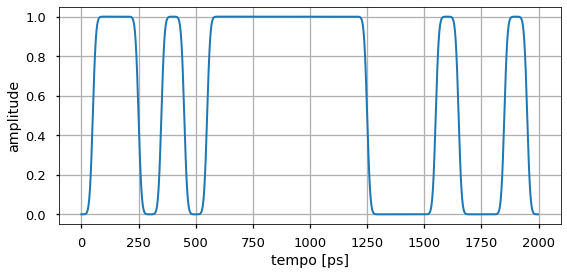

In [41]:
plt.figure(figsize=(9,4))
plt.plot(t, np.abs(MZM(sigTx_nrz.real, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.grid(True)

In [42]:
Vpi  = 1
Vdc  = -Vpi/2

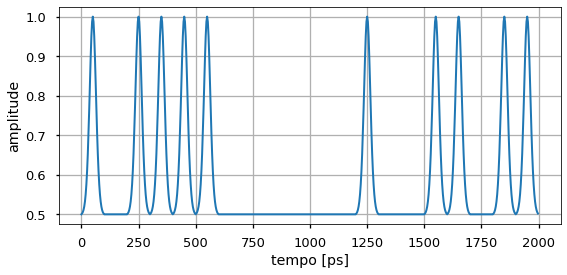

In [43]:
plt.figure(figsize=(9,4))
plt.plot(t, np.abs(MZM(sigTx_nrz.real, Vdc, Vpi))**2, linewidth = 2, label = 'Power')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.grid(True)